In [3]:
import pandas as pd 

In [4]:
### 데이터 불러들이기
# - bicycle_out.csv 파일 읽어들이기
# - 데이터프레임변수명 : df

file_path = "./data/bicycle_out.csv"
df =  pd.read_csv(file_path, encoding="euc-kr")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,396.000000,420.000000,409.000000,405.000000,404.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.258985,26.270667,1.687148,20.237064,3028.272755,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.000000,14.000000,1680.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3757.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


In [10]:
### 나이 데이터에서 100모다 큰값 필터링하기
df[df["나이"] > 100]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,NaN,2300.0,220


### 결측치 처리하기
#### - 삭제(행 또는 열), 대체(평균, 주변데이터 분석)

In [10]:
### 결측치가 있는 행을 삭제하기
# - 삭제 후 저장할 변수명 : df_drop_allrow
df_drop_allrow = df.dropna(axis=0)
df_drop_allrow.info()
df_drop_allrow

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    358 non-null    object 
 1   대여일시     358 non-null    object 
 2   대여소번호    358 non-null    int64  
 3   대여소명     358 non-null    object 
 4   대여거치대    358 non-null    float64
 5   반납일시     358 non-null    object 
 6   반납대여소번호  358 non-null    int64  
 7   반납대여소명   358 non-null    object 
 8   반납거치대    358 non-null    float64
 9   이용시간     358 non-null    float64
 10  이용거리     358 non-null    float64
 11  나이       358 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 36.4+ KB


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
6,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [13]:
### 삭제 이후 데이터프레임의 인덱스 번호 재배열하기
df_drop_allrow = df_drop_allrow.reset_index(drop=True)
df_drop_allrow

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
3,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
4,SPB-18350,2019-11-06 8:35,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:10,3,중랑센터,2.0,9.0,1390.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
353,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
354,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
355,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
356,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [14]:
df_drop_allrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    358 non-null    object 
 1   대여일시     358 non-null    object 
 2   대여소번호    358 non-null    int64  
 3   대여소명     358 non-null    object 
 4   대여거치대    358 non-null    float64
 5   반납일시     358 non-null    object 
 6   반납대여소번호  358 non-null    int64  
 7   반납대여소명   358 non-null    object 
 8   반납거치대    358 non-null    float64
 9   이용시간     358 non-null    float64
 10  이용거리     358 non-null    float64
 11  나이       358 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 33.7+ KB


### 이상치 데이터 확인을 위한 시각화
#### - 박스플롯(boxplot) 사용

In [15]:
### 시각화 라이브러리 불러들이기
import matplotlib as mpl
import matplotlib.pylab as plt

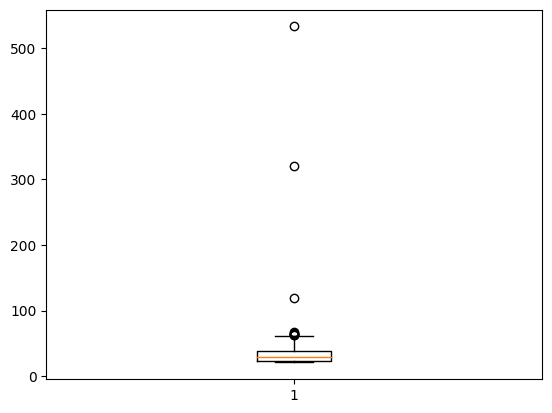

count    358.000000
mean      35.159218
std       32.747653
min       21.000000
25%       24.000000
50%       29.000000
75%       39.000000
max      533.000000
Name: 나이, dtype: float64

In [17]:
### [나이] 항목에 대한 이상한 값에 대한 확인
# - 박스플롯(boxplot) 시각화로 확인
plt.boxplot(df_drop_allrow["나이"])
plt.show()

df_drop_allrow["나이"].describe()

In [19]:
# 나이가 100살보다 큰 값들에 대해서 조회
df_drop_allrow[ df_drop_allrow["나이"] > 100 ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


In [20]:
### 21살보다 작은값 조회
df_drop_allrow[ df_drop_allrow["나이"] < 21 ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이


In [24]:
### 나이가 100보다 크거나, 21보다 작은값 조회하기
df_drop_allrow[ (df_drop_allrow["나이"] > 100) | (df_drop_allrow["나이"] < 21) ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320


### Outliers 확인하기

In [25]:
import numpy as np

In [27]:
### 25% 및 75% 시점의 데이터 확인하기
# q1 = 25%
# q3 = 75%
q1, q3 = np.percentile(df_drop_allrow["나이"], [25, 75])

In [29]:
print("q1 = ", q1)
print("q3 = ", q3)

q1 =  24.0
q3 =  39.0


In [30]:
### IQR 계산하기
iqr = q3 - q1
iqr

15.0

In [31]:
### Minimum Outliers 계산하기
lower_bound = q1 - (iqr * 1.5)
lower_bound

1.5

In [32]:
### Miaximum Outliers 계산하기
upper_bound = q3 + (iqr * 1.5)
upper_bound

61.5

In [33]:
### 이상치를 벗어나는 데이터 조회하기
df_drop_allrow[ (df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound) ]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
2,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
19,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
33,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
117,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.0,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.0,1130.0,65
180,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.0,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.0,12610.0,66
218,SPB-15960,2019-11-08 9:10,103,망원역 2번출구 앞,1.0,2019-11-08 9:18,101,(구)합정동 주민센터,4.0,8.0,1060.0,63
246,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.0,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.0,1360.0,65
304,SPB-24781,2019-11-12 9:47,104,합정역 1번출구 앞,10.0,2019-11-12 9:53,101,(구)합정동 주민센터,3.0,6.0,1070.0,63
305,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.0,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.0,5600.0,65
306,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.0,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.0,2060.0,67


In [35]:
(df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound)

0      False
1      False
2       True
3      False
4      False
       ...  
353    False
354    False
355    False
356    False
357    False
Name: 나이, Length: 358, dtype: bool

In [36]:
### 이상 데이터 제거하기
df_drop_allrow[ (df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound) == False ]

len(df_drop_allrow[ (df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound) == False ])

348

In [39]:
### 이상치 데이터를 대체하기
# - 대체하기 위해서는 이상데이터의 인덱스 번호를 알아야
# - 해당 인덱스의 항목 값을 수정할 수 있습니다.

### 이상치를 벗어나는 데이터 조회하기
df_drop_allrow[ (df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound) ].index

Int64Index([2, 19, 33, 117, 180, 218, 246, 304, 305, 306], dtype='int64')

In [42]:
# 리스트로 형변환
df_list = list(df_drop_allrow[ (df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound) ].index)
df_list

[2, 19, 33, 117, 180, 218, 246, 304, 305, 306]

In [41]:
np.where((df_drop_allrow["나이"] > upper_bound) | (df_drop_allrow["나이"] < lower_bound))

(array([  2,  19,  33, 117, 180, 218, 246, 304, 305, 306], dtype=int64),)

In [48]:
### 특정 행 접근 방식 : iloc[행:열], loc[행:열]
# - 행과 열을 찾고자 할 때 사용
# - 특정 행의 열의 값을 바꾸고자 할 때 사용
# iloc : 인덱스 숫자 번호(0부터 ~ 시작)
# loc : 인덱스 값(눈에 보이는 인덱스 값)

for i in df_list :
    print(df_drop_allrow.iloc[i, 11])

120
533
320
65
66
63
65
63
65
67


In [49]:
# 참고---------- loc : 인덱스 값(눈에 보이는 인덱스 값)
for i in df_list :
    print(df_drop_allrow.loc[i, "나이"])

120
533
320
65
66
63
65
63
65
67
